DATA EXPLORATION

train.json, test.json

The data (train.json, test.json) is presented in json format. The files consist of a list of images, and for each image, you can find the following fields:

id - the id of the image
band_1, band_2 - the flattened image data. Each band has 75x75 pixel values in the list, so the list has 5625 elements. Note that these values are not the normal non-negative integers in image files since they have physical meanings - these are float numbers with unit being dB. Band 1 and Band 2 are signals characterized by radar backscatter produced from different polarizations at a particular incidence angle. The polarizations correspond to HH (transmit/receive horizontally) and HV (transmit horizontally and receive vertically). More background on the satellite imagery can be found here.
inc_angle - the incidence angle of which the image was taken. Note that this field has missing data marked as "na", and those images with "na" incidence angles are all in the training data to prevent leakage.
is_iceberg - the target variable, set to 1 if it is an iceberg, and 0 if it is a ship. This field only exists in train.json.

In [143]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_colwidth= 999

In [144]:
data_dir = './data'
train_json = data_dir+'/train.json'

In [19]:
train = pd.read_json(train_json)

In [145]:
train.shape

(1604, 5)

In [146]:
train[0:1]

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -29.537971, -29.092485, -32.834259, -32.190609, -29.538139, -28.668869, -29.092695, -26.813871, -26.813911, -28.264969, -25.571039, -26.170347, -25.571125, -28.265137, -28.265181, -26.170513, -28.669331, -24.232399, -25.571377, -30.504866, -31.031487, -29.538857, -27.879414, -26.814545, -24.484478, -25.571672, -28.265686, -29.539068, -28.669796, -27.509998, -31.031866, -31.03191, -31.03195, -29.53932, -29.53936, -34.286621, -28.670132, -25.866602, -27.510378, -26.171484, -26.487411, -30.009279, -31.032372, -26.487539, -29.539783, -31.032497, -29.094337, -28.670595, -26.815557, -25.28783, -25.572683, -31.032751, -36.030342, -33.531609, -31.593452, -29.094717, -27.880804, -26.815933, -27.156643, -27.880932, -31.593704, -31.593744, -30.010164, -31.033257, -28.267242, -25.012739, -25.288548, -27.157022, -26.48859, -25.573483, -26.488674, -30.507013, -28.66853, -27.878401, -27.508776, -34.285191, -31.591261, -30.504148, -32.190609, -29.53813...","[-27.154118, -29.537888, -31.0306, -32.190483, -32.834217, -31.030729, -31.030769, -32.834343, -28.668869, -27.154495, -29.538267, -30.5044, -30.504444, -32.190903, -35.113506, -34.285694, -36.02874, -31.031235, -31.031275, -29.093117, -29.538689, -31.031401, -28.26539, -27.509661, -28.669544, -30.504992, -31.031612, -29.093454, -28.265644, -29.09354, -28.265686, -29.09358, -30.008774, -32.835396, -31.592484, -33.530724, -34.286537, -32.835567, -32.191917, -33.530891, -30.505581, -32.192043, -32.192085, -31.592863, -31.03233, -31.032372, -32.192253, -28.266401, -27.880341, -30.009489, -31.032581, -32.192463, -30.009615, -29.094507, -26.815683, -29.094591, -31.593409, -28.670891, -26.815851, -29.094761, -32.836536, -35.115444, -30.506508, -30.506552, -31.593744, -31.033213, -31.59383, -31.033297, -32.836872, -33.532158, -29.540751, -28.671478, -29.095308, -29.540878, -27.511766, -31.030518, -33.529335, -31.591175, -31.591217, -30.007633, -29.092525, -32.190609, -31.591387, -32.1906...",dfd5f913,43.9239,0


In [21]:
train[0:1][['band_1']]

,band_1
0,"[-27.878360999999998, -27.15416, -28.668615, -29.537971, -29.092485, -32.834259, -32.190609, -29.538139, -28.668869, -29.092695, -26.813871, -26.813911, -28.264969, -25.571039, -26.170347, -25.571125, -28.265137, -28.265181, -26.170513, -28.669331, -24.232399, -25.571377, -30.504866, -31.031487, -29.538857, -27.879414, -26.814545, -24.484478, -25.571672, -28.265686, -29.539068, -28.669796, -27.509998, -31.031866, -31.03191, -31.03195, -29.53932, -29.53936, -34.286621, -28.670132, -25.866602, -27.510378, -26.171484, -26.487411, -30.009279, -31.032372, -26.487539, -29.539783, -31.032497, -29.094337, -28.670595, -26.815557, -25.28783, -25.572683, -31.032751, -36.030342, -33.531609, -31.593452, -29.094717, -27.880804, -26.815933, -27.156643, -27.880932, -31.593704, -31.593744, -30.010164, -31.033257, -28.267242, -25.012739, -25.288548, -27.157022, -26.48859, -25.573483, -26.488674, -30.507013, -28.66853, -27.878401, -27.508776, -34.285191, -31.591261, -30.504148, -32.190609, -29.53813..."


In [147]:
train_iceberg = train[train['is_iceberg']==1].sample(n=30,random_state=123)
train_ship = train[train['is_iceberg']==0].sample(n=30,random_state=123)

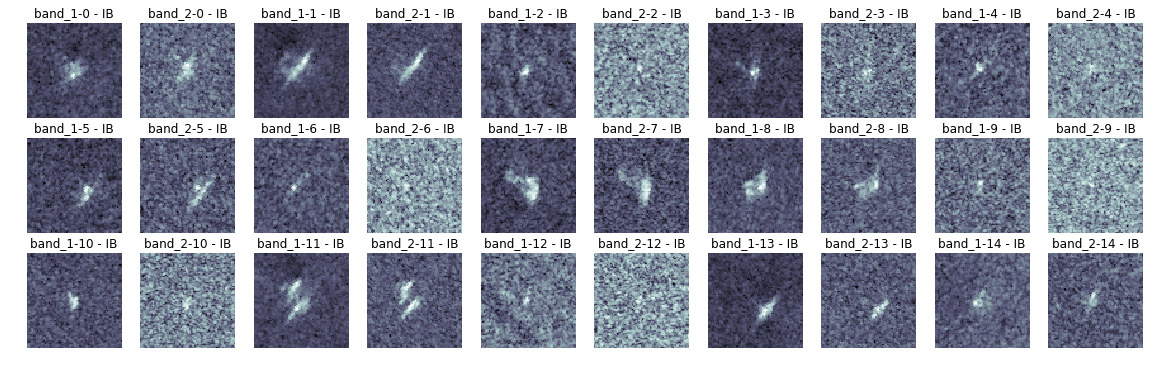

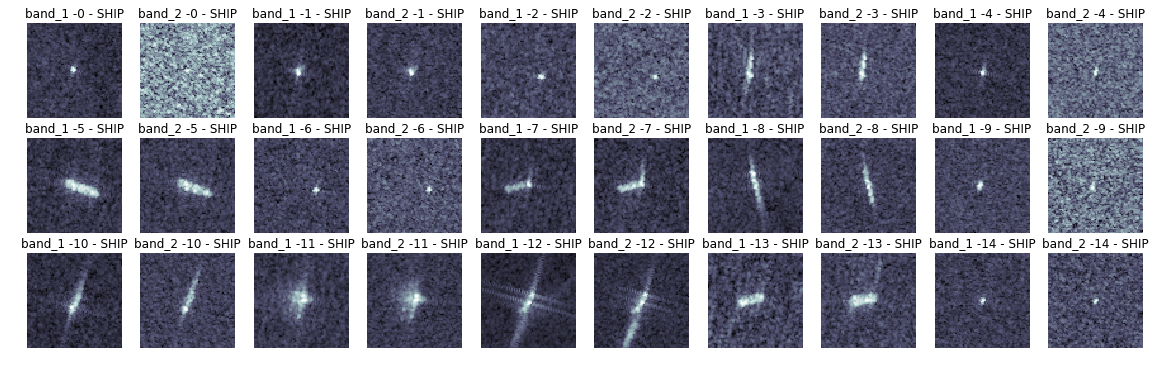

In [158]:
# Plot ICEBERGS EXAMPLES
rows = 3
pics = 5
pic = 0
fig = plt.figure(figsize=(20,6) )
#fig, axes = plt.subplots(rows,2, figsize=(15,15))
for i in range(rows*pics):
    # band_1
    pic = pic +1
    ax = fig.add_subplot(rows,pics*2,pic)
    ax.set_axis_off()
    arr = np.reshape(np.array(train_iceberg.iloc[i,0]),(75,75))
    ax.set_title('band_1-{ind} - IB'.format(ind = i))
    ax.imshow(arr,cmap='bone') # inferno, viridis

    # band_2
    pic = pic+1
    ax = fig.add_subplot(rows,pics*2,pic)
    ax.set_axis_off()
    arr = np.reshape(np.array(train_iceberg.iloc[i,1]),(75,75))
    ax.set_title('band_2-{ind} - IB'.format(ind = i))
    ax.imshow(arr,cmap='bone')

plt.show()
##########################3
# Plot SHIPS EXAMPLES
rows = 3
pics = 5
pic = 0
fig = plt.figure(figsize=(20,6) )
#fig, axes = plt.subplots(rows,2, figsize=(15,15))
for i in range(rows*pics):   
    # band_1
    pic = pic +1
    ax = fig.add_subplot(rows,pics*2,pic)
    ax.set_axis_off()
    arr = np.reshape(np.array(train_ship.iloc[i,0]),(75,75))
    ax.set_title('band_1 -{ind} - SHIP'.format(ind = i))
    ax.imshow(arr,cmap='bone') # inferno, viridis

    # band_2
    pic = pic+1
    ax = fig.add_subplot(rows,pics*2,pic)
    ax.set_axis_off()
    arr = np.reshape(np.array(train_ship.iloc[i,1]),(75,75))
    ax.set_title('band_2 -{ind} - SHIP'.format(ind = i))
    ax.imshow(arr,cmap='bone')
plt.show()



In [ ]:
## IMAGE TRANSFORMATION

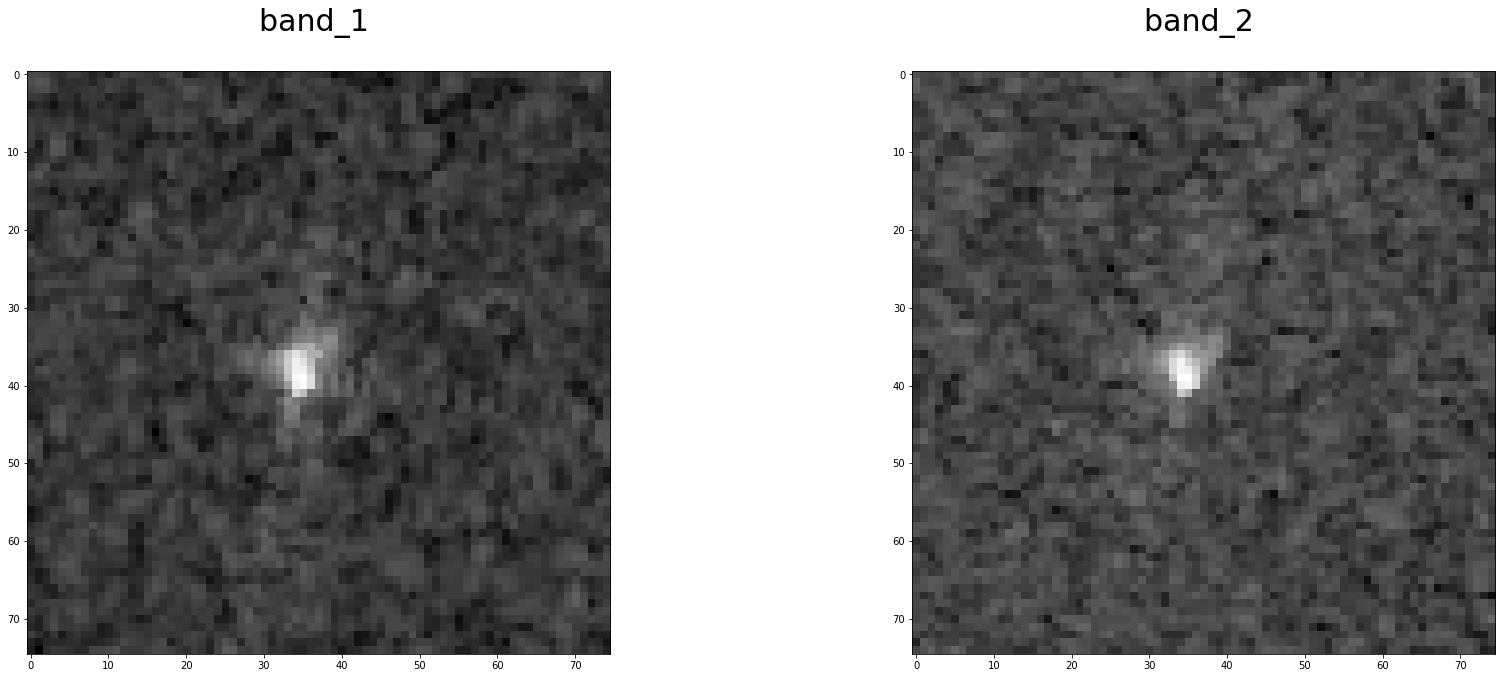

In [159]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
image = np.reshape(np.array(train_ship.iloc[1,0]),(75,75))
ax1.imshow(image, cmap='gray')
ax1.set_title('band_1 \n', fontsize=30)

image = np.reshape(np.array(train_ship.iloc[1,1]),(75,75))
ax2.imshow(image, cmap='gray')
ax2.set_title('band_2 \n', fontsize=30)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()


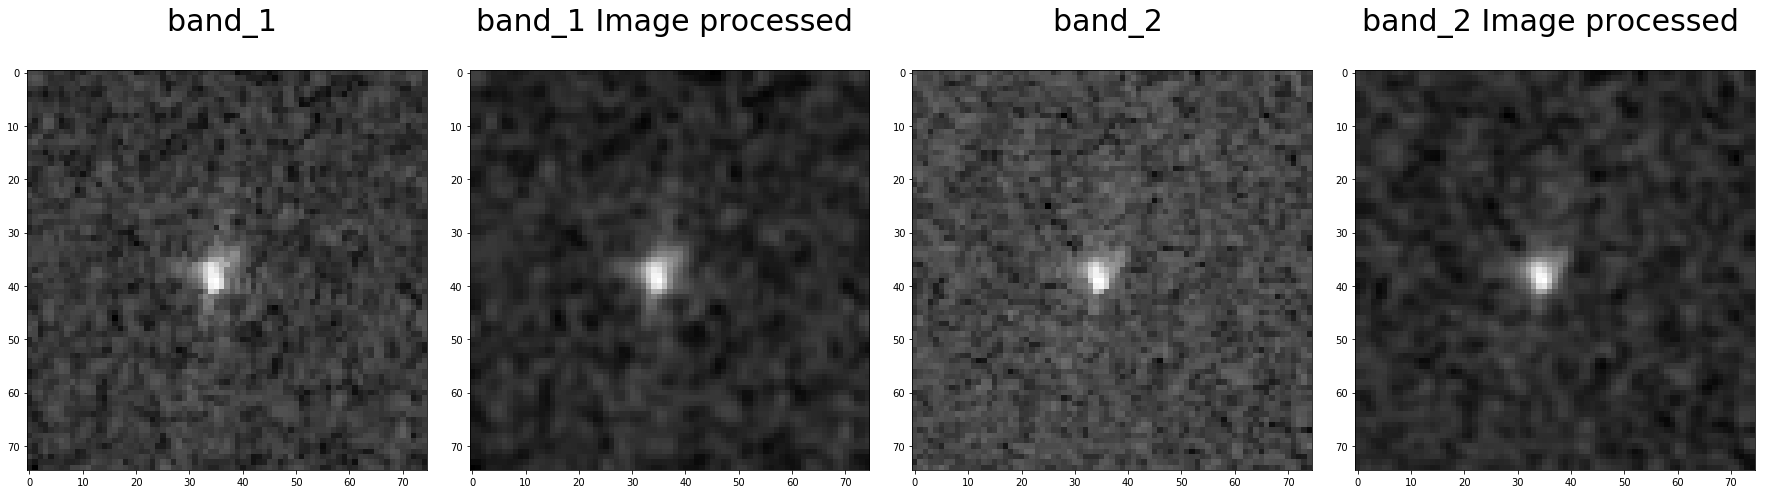

In [283]:
def image_transformation(image):
    sobel_kernel = 3
    sx_thresh=(180, 255)

    # Normalize the image to [0,255]
    #--------------------------------
    max_arg = np.max(image)
    min_arg = np.min(image)
    img_norm = (image - min_arg) /(max_arg-min_arg) *(255)
    
    #Gaussian blur
    #--------------------------------
    kernel_size = 3 # Must be an odd number (3, 5, 7...)
    blur_gray = cv2.GaussianBlur(img_norm, (kernel_size, kernel_size), 0)
    result = blur_gray
    
    # Threshold blur gray into a binary image
    # bgbinary = np.zeros_like(blur_gray)
    #bgbinary[(blur_gray >= sx_thresh[0]) & (blur_gray <= sx_thresh[1])] = 1
    #result = bgbinary


    # Define our parameters for Canny and run it
    #low_threshold = 220
    #high_threshold = 255
    #blur_grayCopy = np.uint8(blur_gray)
    #image_canny = cv2.Canny(blur_grayCopy, low_threshold, high_threshold)
         

    # Sobel x    
    #sobelx = cv2.Sobel(blur_gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel) # Take the derivative in x
    #abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    #scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    #result = scaled_sobel

    # Threshold x gradient
    #sxbinary = np.zeros_like(scaled_sobel)
    #sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    #result = sxbinary

    # Combine the two binary thresholds
    #combined_binary = np.zeros_like(sxbinary)
    #combined_binary[(bgbinary == 1) | (sxbinary == 1)] = 1
    #result = combined_binary
    
    #result = image_canny#blur_gray#image_canny
    return(result)
    
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
image = np.reshape(np.array(train_ship.iloc[1,0]),(75,75))
result =  image_transformation(image)

ax1.imshow(image, cmap='gray') #, interpolation='bicubic'
ax1.set_title('band_1 \n', fontsize=30)


#arr_ab =  np.reshape(np.absolute(np.array(train_ship.iloc[1,0])),(75,75))
ax2.imshow(result, cmap='gray')
#ax2.imshow(img_norm, cmap='gray')
ax2.set_title('band_1 Image processed \n', fontsize=30)

image = np.reshape(np.array(train_ship.iloc[1,1]),(75,75))
result =  image_transformation(image)

ax3.imshow(image, cmap='gray')
ax3.set_title('band_2 \n', fontsize=30)
ax4.imshow(result, cmap='gray')
ax4.set_title('band_2 Image processed \n', fontsize=30)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()


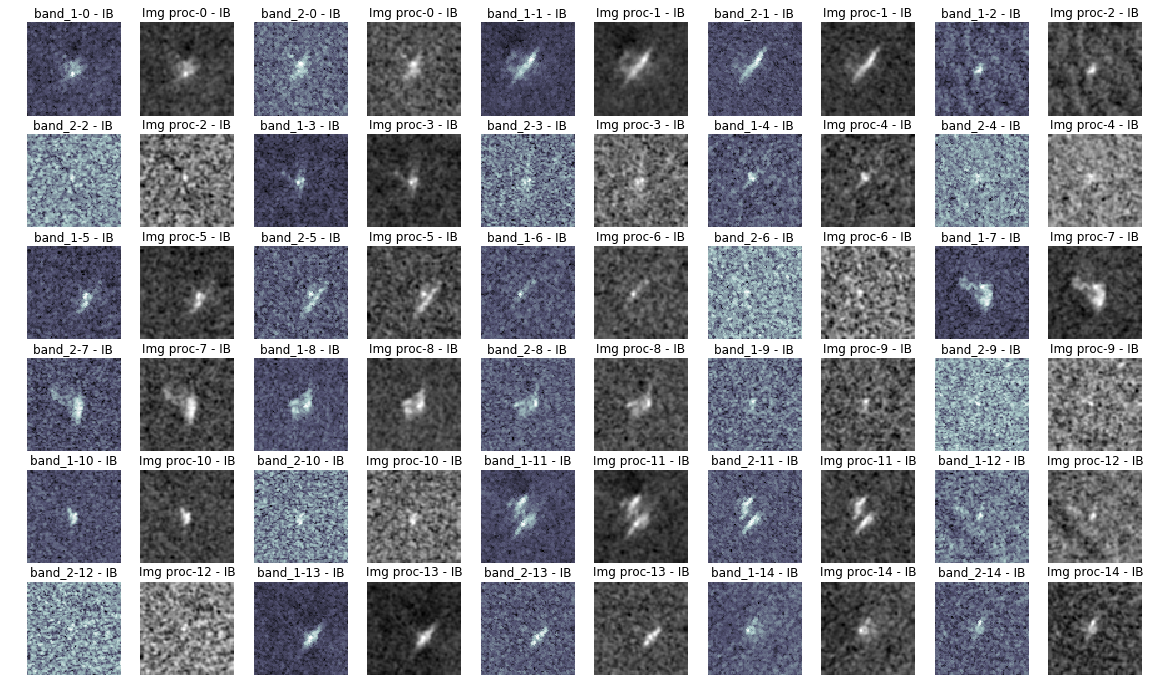

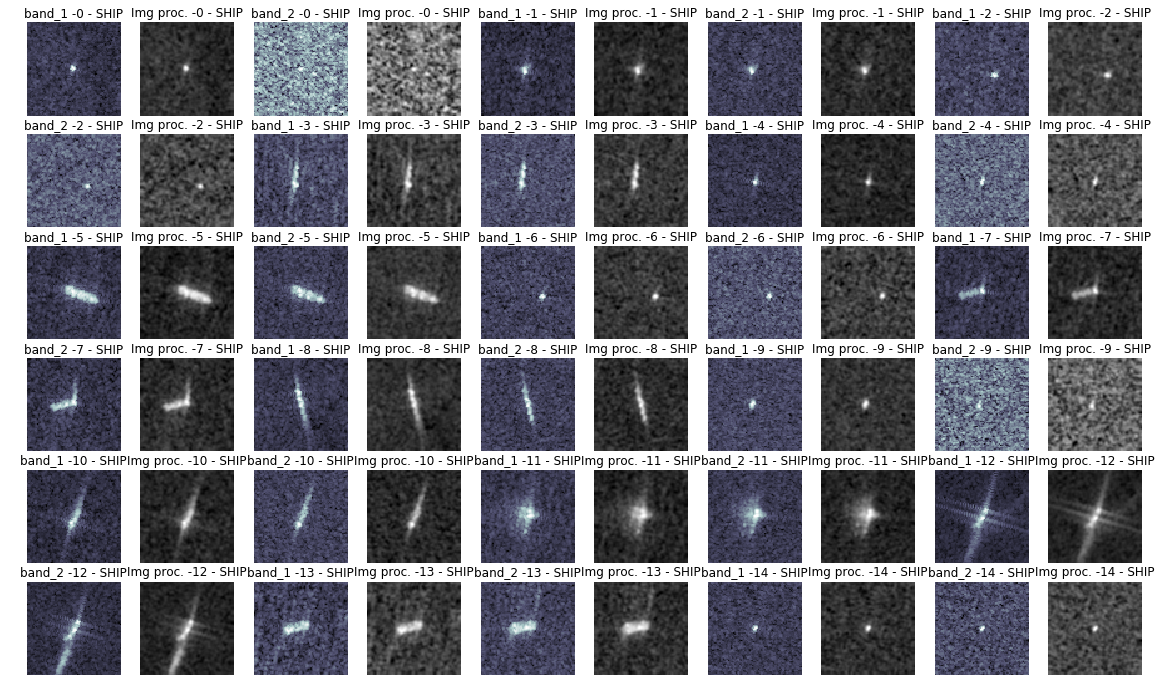

In [285]:
# Plot ICEBERGS EXAMPLES
rows = 3
pics = 5
pic = 0
fig = plt.figure(figsize=(20,12) )
#fig, axes = plt.subplots(rows,2, figsize=(15,15))
for i in range(rows*pics):
    # band_1
    pic = pic +1
    ax = fig.add_subplot(rows*2,pics*2,pic)
    ax.set_axis_off()
    arr = np.reshape(np.array(train_iceberg.iloc[i,0]),(75,75))
    ax.set_title('band_1-{ind} - IB'.format(ind = i))
    ax.imshow(arr,cmap='bone') # inferno, viridis, bone

    # Image processed
    pic = pic+1
    ax = fig.add_subplot(rows*2,pics*2,pic)
    ax.set_axis_off()
    result =  image_transformation(arr)
    #arr = np.reshape(np.array(train_iceberg.iloc[i,1]),(75,75))
    ax.set_title('Img proc-{ind} - IB'.format(ind = i))
    ax.imshow(result,cmap='gray')

    # band_2
    pic = pic+1
    ax = fig.add_subplot(rows*2,pics*2,pic)
    ax.set_axis_off()
    arr = np.reshape(np.array(train_iceberg.iloc[i,1]),(75,75))
    ax.set_title('band_2-{ind} - IB'.format(ind = i))
    ax.imshow(arr,cmap='bone')

    # Image processed band_2
    pic = pic+1
    ax = fig.add_subplot(rows*2,pics*2,pic)
    ax.set_axis_off()
    result =  image_transformation(arr)
    ax.set_title('Img proc-{ind} - IB'.format(ind = i))
    ax.imshow(result,cmap='gray')
plt.show()
##########################3
# Plot SHIPS EXAMPLES
rows = 3
pics = 5
pic = 0
fig = plt.figure(figsize=(20,12) )
#fig, axes = plt.subplots(rows,2, figsize=(15,15))
for i in range(rows*pics):   
    # band_1
    pic = pic +1
    ax = fig.add_subplot(rows*2,pics*2,pic)
    ax.set_axis_off()
    arr = np.reshape(np.array(train_ship.iloc[i,0]),(75,75))
    ax.set_title('band_1 -{ind} - SHIP'.format(ind = i))
    ax.imshow(arr,cmap='bone') # inferno, viridis

    # band_1 Image processed
    pic = pic+1
    ax = fig.add_subplot(rows*2,pics*2,pic)
    ax.set_axis_off()
    result =  image_transformation(arr)
    #arr = np.reshape(np.array(train_ship.iloc[i,1]),(75,75))
    ax.set_title('Img proc. -{ind} - SHIP'.format(ind = i))
    ax.imshow(result,cmap='gray')

    # band_2
    pic = pic +1
    ax = fig.add_subplot(rows*2,pics*2,pic)
    ax.set_axis_off()
    arr = np.reshape(np.array(train_ship.iloc[i,1]),(75,75))
    ax.set_title('band_2 -{ind} - SHIP'.format(ind = i))
    ax.imshow(arr,cmap='bone') # inferno, viridis

    # Image processed band_2
    pic = pic+1
    ax = fig.add_subplot(rows*2,pics*2,pic)
    ax.set_axis_off()
    result =  image_transformation(arr)
    ax.set_title('Img proc. -{ind} - SHIP'.format(ind = i))
    ax.imshow(result,cmap='gray')

plt.show()


In [ ]:
# Plot SHIPS EXAMPLES
rows = 3
pic = 0
fig = plt.figure(figsize=(10,20) )
#fig, axes = plt.subplots(rows,2, figsize=(15,15))
for i in range(rows):
#    ax.set_axis_off()
    # band_1
    pic = pic +1
    ax = fig.add_subplot(rows+1,2,pic)
    arr = np.reshape(np.array(train_ship.iloc[i,0]),(75,75))
    ax.set_title('band_1 - {ind} - SHIP'.format(ind = i))
    ax.imshow(arr,cmap='bone') # inferno, viridis

    # band_2
    pic = pic+1
    ax = fig.add_subplot(rows+1,2,pic)
    arr = np.reshape(np.array(train_ship.iloc[i,1]),(75,75))
    ax.set_title('band_2 - {ind} - SHIP'.format(ind = i))
    ax.imshow(arr,cmap='bone')
plt.show()

In [106]:
train.columns

Index(['band_1', 'band_2', 'id', 'inc_angle', 'is_iceberg'], dtype='object')

In [119]:
train['inc_angle'] = pd.to_numeric(train['inc_angle'],errors='coerce')
train[['inc_angle', 'is_iceberg']].head()

,inc_angle,is_iceberg
0,43.9239,0
1,38.1562,0
2,45.2859,1
3,43.8306,0
4,35.6256,0


In [123]:
train[['inc_angle', 'is_iceberg']].describe()

,inc_angle,is_iceberg
count,1471.000000,1604.000000
mean,39.268707,0.469451
std,3.839744,0.499222
min,24.754600,0.000000
25%,36.106100,0.000000
50%,39.501500,0.000000
75%,42.559100,1.000000
max,45.937500,1.000000


In [127]:
#np.sqrt(0.469451*(1-0.469451))

0.49906588603009122

In [142]:
#train[train.inc_angle.notnull()]['inc_angle'].tolist()

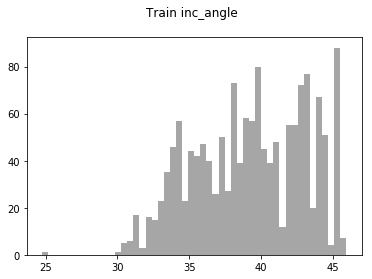

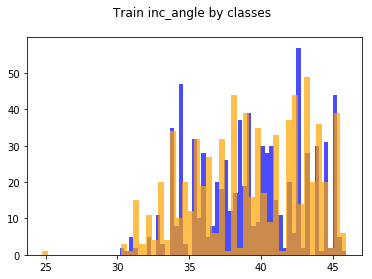

In [141]:
# Plotting inc_angle of train:
plt.hist(train[train.inc_angle.notnull()]['inc_angle'].tolist(), bins=50, color = 'grey', alpha = 0.7)    
plt.title('Train inc_angle \n')
plt.show()

plt.hist(train[(train.inc_angle.notnull()) & (train['is_iceberg'] ==1) ]['inc_angle'].tolist(), bins=50, color = 'blue', alpha = 0.7)    
plt.hist(train[(train.inc_angle.notnull()) & (train['is_iceberg'] ==0) ]['inc_angle'].tolist(), bins=50, color = 'orange', alpha = 0.7)    

plt.title('Train inc_angle by classes \n')
plt.show()